In [1]:
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [3]:
df = pandas.read_csv('../Datasets/movies/movies_evaluations.csv')
nmovies,_ = df.values.shape
names = df.values[:,0]
evaluations = df.values[:,1:]
df

,Unnamed: 0,523,150,649,362,144,915,641,398,726,...,392,233,302,536,415,275,449,12,654,404
0,Apollo 13 (1995),0.0,4.0,0.0,4.0,0.0,4.0,5.0,2.0,5.0,...,4.0,4.0,3.0,3.0,5.0,4.0,4.0,5.0,3.0,4.0
1,Groundhog Day (1993),0.0,5.0,3.0,0.0,4.0,3.0,3.0,0.0,4.0,...,3.0,3.0,5.0,3.0,4.0,4.0,4.0,5.0,2.0,4.0
2,Jaws (1975),4.0,4.0,4.0,3.0,5.0,4.0,1.0,3.0,2.0,...,0.0,4.0,5.0,3.0,5.0,5.0,3.0,5.0,3.0,5.0
3,"Shawshank Redemption, The (1994)",2.0,5.0,0.0,0.0,4.0,5.0,5.0,3.0,0.0,...,4.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0
4,Aliens (1986),0.0,2.0,4.0,4.0,5.0,4.0,0.0,3.0,4.0,...,0.0,3.0,5.0,2.0,4.0,5.0,4.0,3.0,2.0,1.0
5,When Harry Met Sally... (1989),5.0,4.0,4.0,3.0,5.0,4.0,3.0,0.0,0.0,...,0.0,3.0,5.0,3.0,5.0,0.0,5.0,3.0,4.0,2.0
6,Alien (1979),0.0,3.0,4.0,4.0,5.0,4.0,0.0,0.0,3.0,...,0.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,4.0,1.0
7,Twister (1996),4.0,3.0,4.0,0.0,3.0,2.0,3.0,3.0,4.0,...,4.0,0.0,2.0,0.0,2.0,3.0,3.0,4.0,2.0,0.0
8,Mr. Holland's Opus (1995),0.0,4.0,3.0,0.0,2.0,0.0,5.0,5.0,0.0,...,3.0,3.0,3.0,3.0,4.0,0.0,3.0,0.0,3.0,0.0
9,"Birdcage, The (1996)",0.0,4.0,3.0,3.0,2.0,0.0,0.0,0.0,3.0,...,2.0,3.0,4.0,2.0,4.0,4.0,3.0,1.0,3.0,0.0


In [22]:
# Calcular las distancias entre películas
def movies_distance( m1, m2):
    idx = np.logical_and( m1!=0, m2!=0)
    m1 = m1[idx]
    m2 = m2[idx]
    return np.mean(np.abs(m1 - m2))

D = np.zeros((nmovies,nmovies))
for i in range(nmovies):
    for j in range(i+1,nmovies):
        mi = evaluations[i,:]
        mj = evaluations[j,:]
        D[i,j] = D[j,i] = movies_distance( mi,mj )

dfdist = pandas.DataFrame(D,index=names,columns=names)
dfdist.to_csv('dist_movies.csv')

In [15]:
model = MDS(n_components=2,dissimilarity='precomputed')
X = model.fit_transform(D)

In [18]:
print(X.shape)

(50, 2)


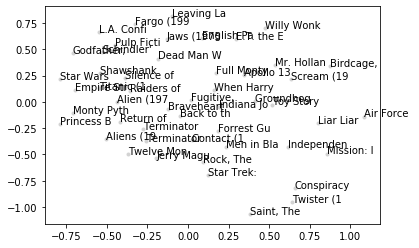

In [21]:
plt.figure()
plt.plot(X[:,0],X[:,1],'.',color = 'lightgray')
for i in range(nmovies):
    plt.text(X[i,0],X[i,1],names[i][:10])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


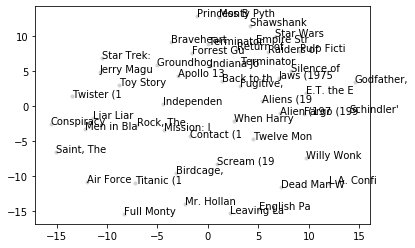

In [24]:
model = MDS(n_components=2)
X = model.fit_transform(evaluations)

plt.figure()
plt.plot(X[:,0],X[:,1],'.',color = 'lightgray')
for i in range(nmovies):
    plt.text(X[i,0],X[i,1],names[i][:10])
plt.show()